In [56]:
#  1.Data Cleaning
#-----a) noisy data 
#-----b) missing data 
#-----c) outliers

#  2.Feature Scaling/Data Standardization
#-----a) Normalization (0-1 Transformation) 
#-----b) Z-score 
#-----c) log transformation

#  3.Data Reduction
#-----a) reducing number of observations 
#-----b) reducing number of variables

#  4.Variable Transformation
#-----a) transformations in Continuous var 
#-----b) transformations in Categorical var

# <b> Outlier Analysis for Data Preprocessing
    
### 1) Univariate Outlier Analysis 
### 2) Multivariate Outlier Analysis 


## <b>1. UNIVARIATE OUTLIER ANALYSIS

1- Sectoral Outliers \
2- Standard Deviation aproach \
3- Z-score method \
4- boxplot (interquartile range - IQR) method ==>  IQR=1.5X(Q3-Q1) ==> alt threshold = Q1-IQR / ust threshold=Q3-IQR

<i>We will practice outliers by  1 and 4. methods
    

- How to catch outliers

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = sns.load_dataset("diamonds")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df_num = df.select_dtypes(include = ["float64","int64"])
df_num.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df_num.isnull().sum()

carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

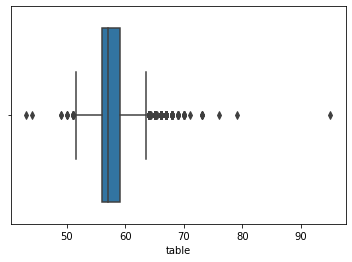

In [8]:
# We can see outliers in boxplot graph

sns.boxplot(x="table", data=df_num);

## <b>a) Interquartile Range (IQR)

IQR is useful if dataset has skewed distribution. Otherwise Standard Deviation can be used instead. \
- Let's prefer IQR to learn detecting outliers using IQR

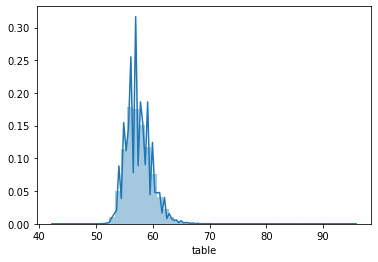

In [15]:
sns.distplot(df["table"])

- Let's find IQR so that we we will define thresholds. So we can detect Outliers easily

In [16]:
q1=df_num["table"].quantile(.25)
q3=df_num["table"].quantile(.75)
IQR = q3 - q1

print("Quartile 1:", str(q1))
print("Quartile 3:", str(q3))
print("IQR:", str(IQR))

Quartile 1: 56.0
Quartile 3: 59.0
IQR: 3.0


- In order to detect outlier thresholds, we need to multiple IQR with 1.5 as a general rule. Then we will detect beyond of Q1 and Q3 adding/substacting the derived value.

In [20]:
# In order to find outlier thresholds, we need to multiple IQR with 1.5 as a general rule.  
# Then we will detect beyond of Q1 and Q3 adding/substacting the derived value.

lower_threshold = q1 - 1.5*IQR
upper_threshold = q3 + 1.5*IQR
print("lower_threshold",lower_threshold) 
print("upper_threshold",upper_threshold)

lower_threshold 51.5
upper_threshold 63.5


- We detect the outliers below

In [24]:
table_outliers = (df["table"]<lower_threshold) | (df["table"]>upper_threshold)
table_outliers

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

- Now we want to get outliers' indexes so that we can manipulate them.

In [32]:
df[table_outliers==True]["table"].index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

- Say our goal is to change outliers with mean value in "table" column

In [36]:
# This mean is NOT correct! Because outliers are included. Let's get mean without outliers
df["table"].mean()

57.45718390804603

In [38]:
df_table_without_outliers = df["table"][~table_outliers]
df_table_without_outliers

0        55.0
1        61.0
3        58.0
4        58.0
5        57.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53335, dtype: float64

In [39]:
#Now we can find mean of "table."

df_table_without_outliers.mean()

57.3734039561264

- Now we can replace mean value with outliers below.

In [40]:
df["table"][table_outliers]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [41]:
df["table"][table_outliers] = df_table_without_outliers.mean()
df["table"][table_outliers]

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2        57.373404
91       57.373404
145      57.373404
219      57.373404
227      57.373404
           ...    
53695    57.373404
53697    57.373404
53756    57.373404
53757    57.373404
53785    57.373404
Name: table, Length: 605, dtype: float64

- Let's check it now if any outlier detects

In [44]:
df[((df["table"]<lower_threshold) | (df["table"]>upper_threshold))==True]

,carat,cut,color,clarity,depth,table,price,x,y,z


## <b>b) Outlier Majorization <b/>
    
This method brings upper and lower outliers to the upper and lower thresholds.

In [45]:
df=sns.load_dataset("diamonds")
df_table=df["table"]
df_table=pd.DataFrame(df_table)
df_table.head()

,table
0,55.0
1,61.0
2,65.0
3,58.0
4,58.0


In [46]:
q1=df_num["table"].quantile(.25)
q3=df_num["table"].quantile(.75)
IQR = q3 - q1
lower_threshold = q1 - 1.5*IQR
upper_threshold = q3 + 1.5*IQR
print("lower_threshold",lower_threshold) 
print("upper_threshold",upper_threshold)

lower_threshold 51.5
upper_threshold 63.5


In [47]:
table_upper_outlier = (df_table>upper_threshold)
table_lower_outlier = (df_table<lower_threshold)
table_upper_outlier.head()

,table
0,False
1,False
2,True
3,False
4,False


In [49]:
df_table[table_upper_outlier].head()

,table
0,NaN
1,NaN
2,65.0
3,NaN
4,NaN


In [50]:
df_table[table_upper_outlier]=upper_threshold
df_table[table_lower_outlier]=lower_threshold

In [51]:
df_table.head()

,table
0,55.0
1,61.0
2,63.5
3,58.0
4,58.0


- Now let's import the change into dataset

In [54]:
# before import

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [55]:
# after import. See third value in "table" column.

df["table"]=df_table
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,63.5,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## <b>2. MULTIVARIATE OUTLIER ANALYSIS
    
Multivariate Outlier is the outliers that appear when several values come together, but not outlier by its own! \
Example: Someone whose age is 18 but has 4 children.
    

- ***Local Outlier Factor*** is used to make Multivariate Outlier Analysis

### <b> a) Cleaning Outliers in Multivariate Outlier Analysis

In [120]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [121]:
dimonds=sns.load_dataset("diamonds")
dimonds=dimonds.select_dtypes(include=["float64", "int64"])
df=dimonds.copy()
df=df.dropna()
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [122]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [123]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [124]:
df_scores = clf.negative_outlier_factor_
df_scores

array([-1.58352526, -1.59732899, -1.62278873, ..., -1.06721815,
       -1.00809552, -1.00849038])

In [125]:
df_scores

array([-1.58352526, -1.59732899, -1.62278873, ..., -1.06721815,
       -1.00809552, -1.00849038])

In [126]:
np.sort(df_scores)[:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

- Theshold is tried to understand going over array. Sudden difference between numbers and clustering provide insight. \
<i>(Esik degeri sayilara bakilarak anlasilmaya calisilir.) sayilar arasindaki ani farkliliklar ve kumelenmeler fikir verir.)
    
Let's get an average value and assume that 13th value in the array will ensure the condition.

In [127]:
threshold = np.sort(df_scores)[13]
threshold

-3.823787967755565

In [128]:
df_scores>threshold

array([ True,  True,  True, ...,  True,  True,  True])

In [131]:
df_nonoutlier= df_scores>threshold
len(df[~df_nonoutlier])

14

In [103]:
df_new= df[df_scores>threshold]
df_new

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [133]:
df_outlier =df[df_scores<=threshold]
df_outlier

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


We just made cleaning ERASING Operation.

### <b>b) Majorization in Multivariate Outlier Analysis

In [134]:
majorizing_value = df[df_scores==threshold]
majorizing_value 

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


Now we will appoint majorizing_value instead of outliers (df_outlier). \
But first, we need to reset index otherwise there will be index error!

In [135]:
df_outlier

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [136]:
res = df_outlier.to_records(index=False)
res

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [137]:
res[:] = majorizing_value.to_records(index=False)
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [138]:
index_ = df[~df_nonoutlier].index

df[~df_nonoutlier] = pd.DataFrame(res, index = index_)
df[~df_nonoutlier]


,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19


In [139]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74
